In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [10]:
filepath = '/Users/jonathanlifferth/PycharmProjects/longevity_solutions_ml/0_master_df.csv'
macro_data = pd.read_csv(filepath, parse_dates=['datetime'], index_col='datetime')
macro_data = macro_data.drop(columns=['Unnamed: 0'])
print(macro_data.shape)
macro_data.head()

(1309200, 5)


,HR,glucose,Vertical,Lateral,Sagittal
datetime,,,,,
2014-10-01 19:14:00,68,185.4,1979,2053,2095
2014-10-01 19:14:00,68,185.4,1979,2053,2096
2014-10-01 19:14:00,68,185.4,1980,2052,2098
2014-10-01 19:14:00,68,185.4,1976,2052,2098
2014-10-01 19:14:00,68,185.4,1978,2052,2098


IndexError: index 5 is out of bounds for axis 0 with size 5

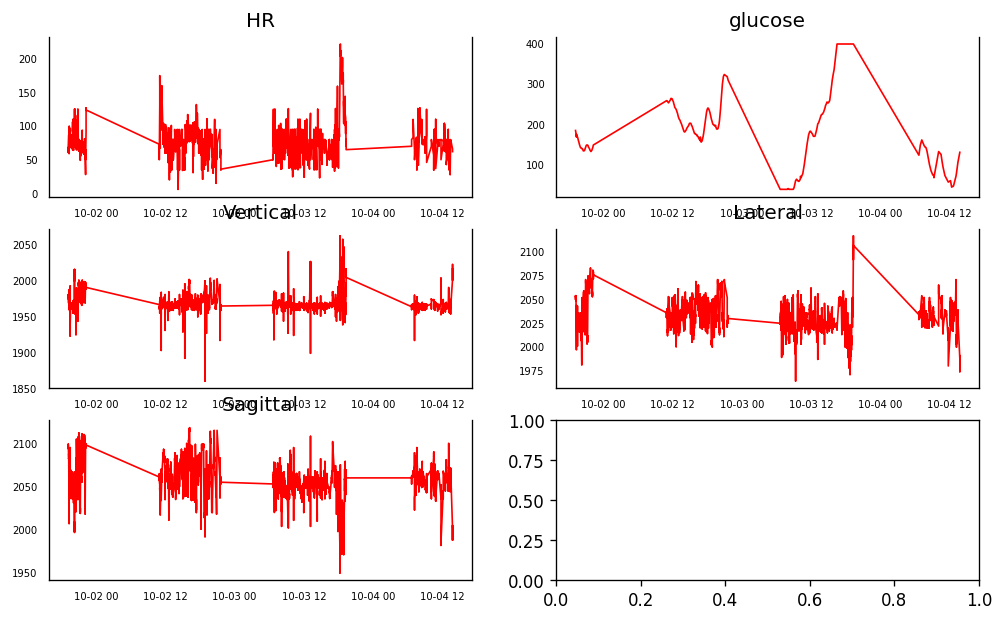

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = macro_data[macro_data.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(macro_data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
ad_fuller_result_1 = adfuller(macro_data['glucose'].diff()[1:])

print('glucose')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(macro_data['HR'].diff()[1:])

print('HR')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

glucose
ADF Statistic: -1144.201045382543
p-value: 0.0

---------------------



In [5]:
print('glucose causes HR?\n')
print('------------------')
granger_1 = grangercausalitytests(macro_data[['HR', 'glucose']], 4)

print('\HR causes glucose?\n')
print('------------------')
granger_2 = grangercausalitytests(macro_data[['glucose', 'HR']], 4)

glucose causes HR?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3873  , p=0.5378  , df_denom=35, df_num=1
ssr based chi2 test:   chi2=0.4205  , p=0.5167  , df=1
likelihood ratio test: chi2=0.4182  , p=0.5179  , df=1
parameter F test:         F=0.3873  , p=0.5378  , df_denom=35, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6166  , p=0.5461  , df_denom=32, df_num=2
ssr based chi2 test:   chi2=1.4258  , p=0.4902  , df=2
likelihood ratio test: chi2=1.3990  , p=0.4968  , df=2
parameter F test:         F=0.6166  , p=0.5461  , df_denom=32, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5273  , p=0.2284  , df_denom=29, df_num=3
ssr based chi2 test:   chi2=5.6879  , p=0.1278  , df=3
likelihood ratio test: chi2=5.2809  , p=0.1523  , df=3
parameter F test:         F=1.5273  , p=0.2284  , df_denom=29, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F tes

In [6]:
macro_data.shape

(39, 5)

In [7]:
train_index = int(len(macro_data) * 0.7)

train_df=macro_data[:-train_index]
test_df=macro_data[-train_index:]

print(test_df.shape)

(27, 5)


In [8]:
model = VAR(train_df.diff()[1:])

In [9]:
sorted_order=model.select_order(maxlags=1)
print(sorted_order.summary())

ValueError: maxlags is too large for the number of observations and the number of equations. The largest model cannot be estimated.